# <center>Maximum Likelihood for Linear & Nonlinear Regression</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize

In [2]:
def scatter_plot(x, y, size, title, ax_labels):
    '''
    this function plots simple scatter plot for 2 variables x,y with fitted regression line
    
    INPUTS:
        x: array of x axis
        y: array of y axis
        size: data size
        title: plot title
        ax_labels: list of axes labels
    '''  
    
    plt.figure(figsize=(5,5))
    
    plt.scatter(x[0:size],y[0:size], alpha = 0.7)
    
    plt.xticks(color='black')
    plt.yticks(color='black')
       
    plt.xlabel(ax_labels[0], color='black', size= 16)        
    plt.ylabel(ax_labels[1], color='black', size= 16)        
    
    plt.title(title, color='black', size= 20)
    
def poly_x(x):
    '''
    this function returns a polynomial function of input x
    
    INPUTS:
        x: array of numerical values
    '''
    
    return .5 + x + x**2

def generate_synthetic_data(size, w, sigma, corr_type):    
    '''
    this function generates synthetic data consists of single predictor X 
    and target variable y. The predictor is governed by a predefined linear 
    coefficients w0 and w1, plus a normally distributed noise of precision 
    beta
    
    INPUTS:
        size: number of observations
        w: coefficients vector
        sigma: noise variance
        corr_type: type of correlation between X and Y (linear or nonlinear)
    OUTPUTS:
        Phi_X: design matrix of predictor X
        y: target variable
    '''      
    
    # set predictor variable X in range (-1, 1)
    X= np.random.rand(size,1) * 2 - 1    
    
    # set noise variable
    epsilon = np.random.normal(loc= 0, scale= sigma**2, size= size)   
              
    # set target variable y
    if corr_type == 'linear':
        y = w @ np.concatenate([np.ones(X.shape), X], axis= 1).T + epsilon 
        
    elif corr_type == 'nonlinear':
        # reset X to non-linear version
        y = w @ np.concatenate([np.ones(X.shape), poly_x(X)], axis= 1).T + epsilon
        
    return X,y

def objective_function(params):
    '''
    this function calculates the objective (log likelihood) function of our regression. 
    It takes initial regression coefficients as input and returns the estimated 
    target variable (y_hat)
    
    Inputs:
        param: array of initial parameters (coefficients + noise variance)
    '''
    
    # set parameters
    w_init = np.array([params[0],params[1]])
    sigma_init = params[2]
        
    # estimate target variable using initial guesses
    if corr_type == 'linear':
        Y_hat = w_init @ np.concatenate([np.ones(X.shape), X], axis= 1).T 
    
    elif corr_type == 'nonlinear':   
        Y_hat = w_init @ np.concatenate([np.ones(X.shape), poly_x(X)], axis= 1).T
    
    # compute log likelihood
    LL = np.sum( stats.norm.logpdf(Y, loc=Y_hat, scale= sigma_init**2) )    
    
    # return negative LL (to be minimized)
    return -LL

In [3]:
# set data size
N = 100

# set vector of coefficients
w = np.array([-0.3,0.5])   

# set noise variance
sigma = 0.2

# set initial guesses for w & noise variance
w_init = np.array([-0.1,0.4])
sigma_init = .5

# append initial w & sigma to params
params = np.append(w_init, sigma_init)

## Linear Regression

Optimization terminated successfully.
         Current function value: -168.037100
         Iterations: 62
         Function evaluations: 112


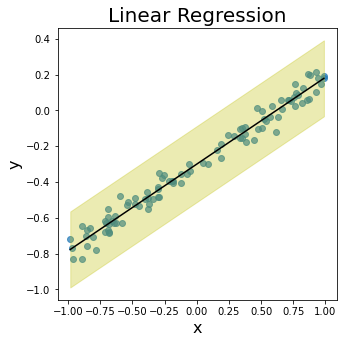

In [4]:
# set correlation type
corr_type = 'linear'

# generate synthetic dataset
X, Y = generate_synthetic_data(N, w, sigma, corr_type)

# minimize objective function (-log likelihood)
results = minimize(objective_function, params, method='Nelder-Mead', options={'disp': True})

# get estimated coefficents
w_pred = np.array([results['x'][0],results['x'][1]])
sigma_pred = results['x'][2]

# predict target variable
y_pred = w_pred @ np.concatenate([np.ones(X.shape), X], axis= 1).T

# plot results
scatter_plot(X, Y, N, 'Linear Regression',['x','y'])
plt.plot(np.sort(X.ravel()), np.sort(y_pred.ravel()),'k')

plt.fill_between(np.sort(X.ravel()), np.sort((y_pred - sigma_pred).ravel()), 
                 np.sort((y_pred + sigma_pred).ravel()), 
                 color='y', alpha=0.3)

## Nonlinear Regression

Optimization terminated successfully.
         Current function value: -184.662834
         Iterations: 80
         Function evaluations: 139


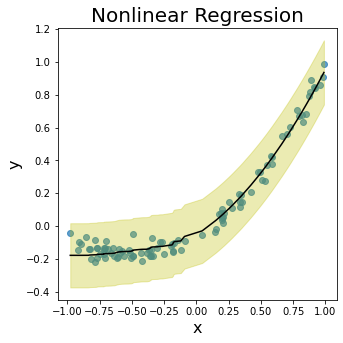

In [5]:
# set correlation type
corr_type = 'nonlinear'

# generate synthetic dataset
X, Y = generate_synthetic_data(N, w, sigma, corr_type)

# minimize objective function (-log likelihood)
results = minimize(objective_function, params, method='Nelder-Mead', options={'disp': True})

# get estimated coefficents
w_pred = np.array([results['x'][0],results['x'][1]])
sigma_pred = results['x'][2]

# predict target variable
y_pred = w_pred @ np.concatenate([np.ones(X.shape), poly_x(X)], axis= 1).T

# plot results
scatter_plot(X, Y, N, 'Nonlinear Regression',['x','y'])

plt.plot(np.sort(X.ravel()), np.sort(y_pred.ravel()),'k')

plt.fill_between(np.sort(X.ravel()), np.sort((y_pred - sigma_pred).ravel()), 
                 np.sort((y_pred + sigma_pred).ravel()), 
                 color='y', alpha=0.3)